In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
with open("./output/bench_mem_retest_data_3090_v5_(1by1)_compile_nHeads8-i64-BS8.json", "r") as f:
    data = json.load(f)

In [3]:
list(data.keys())

['01.3_ViT_train_cifar10_patch1_l2_exp64_att_mlp_s147',
 '01.3_ViT_train_cifar10_patch1_l2_exp64_sAtt_mlp_s147',
 '01.3_ViT_train_cifar10_patch1_l2_exp256_att_mlp_s147',
 '01.3_ViT_train_cifar10_patch1_l2_exp256_sAtt_mlp_s147',
 '01.3_ViT_train_cifar10_patch1_l2_exp512_att_mlp_s147',
 '01.3_ViT_train_cifar10_patch1_l2_exp512_sAtt_mlp_s147',
 '01.3_ViT_train_cifar10_patch1_l2_exp1024_att_mlp_s147',
 '01.3_ViT_train_cifar10_patch1_l2_exp1024_sAtt_mlp_s147',
 '01.3_ViT_train_cifar10_patch2_l2_exp64_att_mlp_s147',
 '01.3_ViT_train_cifar10_patch2_l2_exp64_sAtt_mlp_s147',
 '01.3_ViT_train_cifar10_patch2_l2_exp256_att_mlp_s147',
 '01.3_ViT_train_cifar10_patch2_l2_exp256_sAtt_mlp_s147',
 '01.3_ViT_train_cifar10_patch2_l2_exp512_att_mlp_s147',
 '01.3_ViT_train_cifar10_patch2_l2_exp512_sAtt_mlp_s147',
 '01.3_ViT_train_cifar10_patch2_l2_exp1024_att_mlp_s147',
 '01.3_ViT_train_cifar10_patch2_l2_exp1024_sAtt_mlp_s147',
 '01.3_ViT_train_cifar10_patch4_l2_exp64_att_mlp_s147',
 '01.3_ViT_train_cifar10

In [4]:
keys512 = [[],[]]
for k in data.keys():
    splits = k.split('_')
    patch_size = int(splits[4][5:])
    
    if "512" in splits[6]:
        if splits[7] == "sAtt":
            keys512[0].append(k)
        else:
            keys512[1].append(k)
            
#     print(patch_size)

In [5]:
keys512

[['01.3_ViT_train_cifar10_patch1_l2_exp512_sAtt_mlp_s147',
  '01.3_ViT_train_cifar10_patch2_l2_exp512_sAtt_mlp_s147',
  '01.3_ViT_train_cifar10_patch4_l2_exp512_sAtt_mlp_s147'],
 ['01.3_ViT_train_cifar10_patch1_l2_exp512_att_mlp_s147',
  '01.3_ViT_train_cifar10_patch2_l2_exp512_att_mlp_s147',
  '01.3_ViT_train_cifar10_patch4_l2_exp512_att_mlp_s147']]

In [6]:
print(data[keys512[0][0]])

{'memory': 3536, 'time_train': {'mean': 0.19172719955444337, 'std': 0.8874782974110779, 'min': 0.06409311294555664, 'max': 6.404074192047119}, 'time_test': {'mean': 0.04053709030151367, 'std': 0.13878368607262148, 'min': 0.01782989501953125, 'max': 1.0120160579681396}, 'param': 25179146}


[0.06409311294555664, 0.023854732513427734, 0.012134075164794922] [3536, 1690, 1138] [25179146, 9455114, 5541386]
[0.24598217010498047, 0.030625581741333008, 0.011056661605834961] [22356, 2582, 1222] [25179146, 9455114, 5541386]


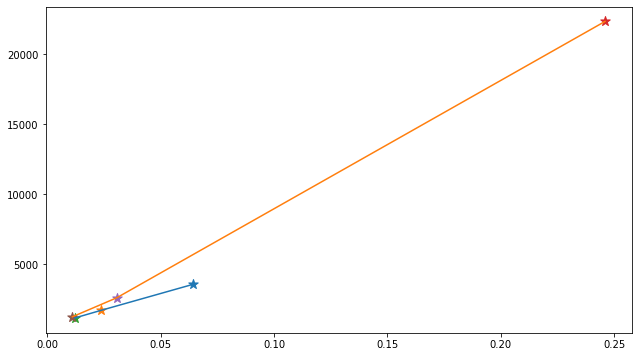

In [7]:
plt.figure(figsize=(10.5, 6))

xs, ys, zs = [], [], [] 
for satt in keys512[0]:
#     print(data[satt])
    d = data[satt]
#     print(d['memory'])
#     print(d['time_train']['min'])   
    mem, tim, parm = d['memory'], d['time_train']['min'], d['param']
    plt.scatter(tim, mem, label="A", marker='*', s=100)
    xs+=[tim]
    ys+=[mem]    
    zs+=[parm]    
    
plt.plot(xs, ys)

print(xs, ys, zs)

xs, ys, zs = [], [], [] 
for satt in keys512[1]:
#     print(data[satt])
    d = data[satt]
#     print(d['memory'])
#     print(d['time_train']['min'])   
    mem, tim, parm = d['memory'], d['time_train']['min'], d['param']
    plt.scatter(tim, mem, label="B", marker='*', s=100)
    xs+=[tim]
    ys+=[mem]    
    zs+=[parm]    
    
plt.plot(xs, ys)

print(xs, ys, zs)

In [8]:
keys512

[['01.3_ViT_train_cifar10_patch1_l2_exp512_sAtt_mlp_s147',
  '01.3_ViT_train_cifar10_patch2_l2_exp512_sAtt_mlp_s147',
  '01.3_ViT_train_cifar10_patch4_l2_exp512_sAtt_mlp_s147'],
 ['01.3_ViT_train_cifar10_patch1_l2_exp512_att_mlp_s147',
  '01.3_ViT_train_cifar10_patch2_l2_exp512_att_mlp_s147',
  '01.3_ViT_train_cifar10_patch4_l2_exp512_att_mlp_s147']]